In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [111]:
df = pd.read_csv('../data/raw/claim_data.csv')
df.head()

,Claim ID,Provider ID,Patient ID,Date of Service,Billed Amount,Procedure Code,Diagnosis Code,Allowed Amount,Paid Amount,Insurance Type,Claim Status,Reason Code,Follow-up Required,AR Status,Outcome
0,0HO1FSN4AP,126528997,7936697103,08/07/2024,304,99231,A02.1,218,203,Self-Pay,Paid,Incorrect billing information,Yes,Pending,Partially Paid
1,9U86CI2P5A,6986719948,1547160031,06/21/2024,348,99213,A16.5,216,206,Medicare,Paid,Pre-existing condition,Yes,Open,Denied
2,1QEU1AIDAU,1355108115,2611585318,07/04/2024,235,99213,A00.1,148,119,Commercial,Under Review,Duplicate claim,No,Denied,Denied
3,WH7XDS8CEO,9991055906,7167948632,05/26/2024,112,99215,A18.6,79,69,Medicare,Denied,Authorization not obtained,No,Partially Paid,Denied
4,M6OJEZ8KGI,7382167012,2140226267,07/16/2024,406,99238,A17.9,320,259,Medicare,Denied,Authorization not obtained,No,On Hold,Denied


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Claim ID            1000 non-null   object
 1   Provider ID         1000 non-null   int64 
 2   Patient ID          1000 non-null   int64 
 3   Date of Service     1000 non-null   object
 4   Billed Amount       1000 non-null   int64 
 5   Procedure Code      1000 non-null   int64 
 6   Diagnosis Code      1000 non-null   object
 7   Allowed Amount      1000 non-null   int64 
 8   Paid Amount         1000 non-null   int64 
 9   Insurance Type      1000 non-null   object
 10  Claim Status        1000 non-null   object
 11  Reason Code         1000 non-null   object
 12  Follow-up Required  1000 non-null   object
 13  AR Status           1000 non-null   object
 14  Outcome             1000 non-null   object
dtypes: int64(6), object(9)
memory usage: 117.3+ KB


In [113]:
df.isnull().sum()

Claim ID              0
Provider ID           0
Patient ID            0
Date of Service       0
Billed Amount         0
Procedure Code        0
Diagnosis Code        0
Allowed Amount        0
Paid Amount           0
Insurance Type        0
Claim Status          0
Reason Code           0
Follow-up Required    0
AR Status             0
Outcome               0
dtype: int64

In [114]:
df['Date of Service'] = pd.to_datetime(df['Date of Service'], errors='coerce')


In [115]:
df['Service_Year'] = df['Date of Service'].dt.year
df['Service_Month'] = df['Date of Service'].dt.month
df['Service_Day'] = df['Date of Service'].dt.day


In [116]:
df.drop(['Claim ID', 'Patient ID', 'Date of Service'], axis=1, inplace=True)


In [117]:
# df.drop(['Claim ID', 'Patient ID'], axis=1, inplace=True)

In [118]:
df['Follow-up Required'] = df['Follow-up Required'].map({'Yes': 1, 'No': 0})


In [119]:
cat_cols = df.select_dtypes(include='object').columns
print("\nCategorical Columns:", list(cat_cols))


Categorical Columns: ['Diagnosis Code', 'Insurance Type', 'Claim Status', 'Reason Code', 'AR Status', 'Outcome']


In [120]:
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [121]:
df.head()

,Provider ID,Billed Amount,Procedure Code,Diagnosis Code,Allowed Amount,Paid Amount,Insurance Type,Claim Status,Reason Code,Follow-up Required,AR Status,Outcome,Service_Year,Service_Month,Service_Day
0,126528997,304,99231,12,218,203,3,1,2,1,5,2,2024,8,7
1,6986719948,348,99213,78,216,206,2,1,6,1,3,0,2024,6,21
2,1355108115,235,99213,1,148,119,0,2,1,0,1,0,2024,7,4
3,9991055906,112,99215,92,79,69,2,0,0,0,4,0,2024,5,26
4,7382167012,406,99238,85,320,259,2,0,0,0,2,0,2024,7,16


In [122]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [123]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(f"\nTraining Samples: {len(X_train)}, Testing Samples: {len(X_test)}")


Training Samples: 800, Testing Samples: 200


In [125]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [126]:
y_pred = model.predict(X_test)


In [127]:
print("\nModel Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Performance:
Accuracy: 0.35

Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.28      0.31        64
           1       0.34      0.54      0.42        67
           2       0.37      0.23      0.29        69

    accuracy                           0.35       200
   macro avg       0.35      0.35      0.34       200
weighted avg       0.36      0.35      0.34       200



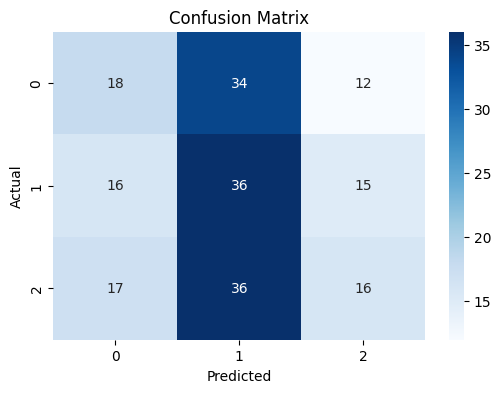

In [128]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

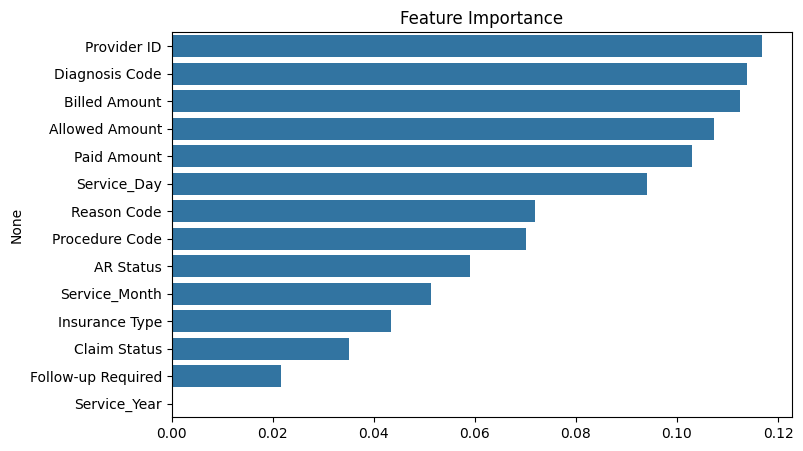

In [129]:
feat_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Feature Importance")
plt.show()

In [130]:
df.to_csv('../data/processed/claims_clean.csv', index=False)
print("\n💾 Cleaned data saved to 'data/processed/claims_clean.csv'")


💾 Cleaned data saved to 'data/processed/claims_clean.csv'


In [132]:
df = pd.read_csv('../data/processed/claims_clean.csv')
df.head(10)

,Provider ID,Billed Amount,Procedure Code,Diagnosis Code,Allowed Amount,Paid Amount,Insurance Type,Claim Status,Reason Code,Follow-up Required,AR Status,Outcome,Service_Year,Service_Month
0,126528997,304,99231,12,218,203,3,1,2,1,5,2,2024,8
1,6986719948,348,99213,78,216,206,2,1,6,1,3,0,2024,6
2,1355108115,235,99213,1,148,119,0,2,1,0,1,0,2024,7
3,9991055906,112,99215,92,79,69,2,0,0,0,4,0,2024,5
4,7382167012,406,99238,85,320,259,2,0,0,0,2,0,2024,7
5,2460400334,272,99231,12,202,176,3,1,5,0,5,2,2024,6
6,4996652383,358,99221,10,249,202,2,0,2,0,0,1,2024,7
7,7437563222,365,99213,58,252,205,1,2,5,0,3,1,2024,5
8,6675789567,126,99238,38,109,108,2,0,0,0,0,2,2024,7
9,7933652528,342,99221,69,258,251,2,1,5,0,2,2,2024,5
